# Read zebris pressure platform ASCII files

Marcos Duarte

The zebris Medical GmbH (https://www.zebris.de/en/) builds devices for measuring pressure on the foot/platform interface.  
The BMClab (http://demotu.org/) has two zebris FDM 1.5 platforms for measuring pressure and each one has the following specs:  
 - Measuring principle: capacitive force measurement  
 - Dimensions: 158 x 60.5 x 2.1 cm (L x W x H)  
 - Sensor area: 149 x 54.2 cm (L x W)  
 - Number of sensors: 11264  
 - Physical resolution: 1.4 sensors /cm2  (0.714 cm2)
 - Sampling frequency: 100 Hz  
 - Measuring Range: 1 - 120 N/cm2  
 - Accuracy of the calibrated measuring range: (1 – 80 N/cm2), ±5% (FS)  
 - Hysteresis: < 3 % (FS)  
 
The two pressure platforms can be synchronized and used as a single 3-m platform.  

The proprietary software to operate the pressure device saves files in ASCII and binary formats with the pressure data. Here are functions for reading most of the files saved in ASCII format. These files have headers with metadata about the patient and acquisition conditions and the data of pressure, force, or center of pressure  depending on the type of acquisition and chosen option to export the data.

## APD file

The .apd file in ASCII contains the metadata and the maximum values of pressure during the trial only at the regions where there were pressure greater than the threshold (1 N/cm2). This file can be used for making insoles.  
Here is a typical .apd file:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(1, r'./../functions')

In [2]:
path2 = './../../../X/zebris/'
filename = path2 + 'MDwalk2.apd'
with open(file=filename, mode='rt', newline='') as f:
    print(f.read())

[General]
Description=pedcad Importfile
Source=<<zebris>>
Date=25/04/2017
Time=18.23.47
UnitDistance=mm
UnitPressure=N/cm2

[Customer]
FirstName=M
LastName=D
Sex=M

[Technical]
MaxSensorsX=353
MaxSensorsY=64
StartSensX=233
StartSensY=8
SensCountX=32
SensCountY=15
LDistX=8.46591
LDistY=8.46591

[Data]
-1	-1	1.0	3.0	2.5	0.5	-1	-1	-1	-1	-1	-1	-1	-1	-1
-1	2.0	10.0	16.5	15.5	7.5	1.5	-1	-1	-1	-1	-1	-1	-1	-1
-1	7.0	21.0	26.0	25.0	20.0	5.5	0.5	-1	-1	-1	-1	-1	-1	-1
0.5	9.5	24.0	30.5	30.5	24.0	10.5	1.0	-1	-1	-1	-1	-1	-1	-1
0.5	9.0	23.5	29.0	29.0	28.5	18.0	3.5	-1	-1	-1	-1	-1	-1	-1
-1	6.0	22.5	28.0	28.0	27.5	21.5	5.5	-1	-1	-1	-1	-1	-1	-1
-1	3.5	16.0	25.5	26.5	25.5	22.0	7.5	0.5	-1	-1	-1	-1	-1	-1
-1	0.5	8.0	19.0	21.5	21.5	18.0	8.0	1.5	-1	-1	-1	-1	-1	-1
-1	-1	2.5	8.0	12.5	14.0	13.0	8.0	3.0	-1	-1	-1	-1	-1	-1
-1	-1	-1	1.5	5.0	7.5	9.0	8.0	4.5	-1	-1	-1	-1	-1	-1
-1	-1	-1	-1	1.0	4.0	6.5	7.5	6.5	2.5	-1	-1	-1	-1	-1
-1	-1	-1	-1	-1	1.5	4.5	7.5	9.0	5.5	1.0	-1	-1	-1	-1
-1	-1	-1	-1	-1	-1	3.0	7.5	11.0	9.5	4.0	-1	-

Here is a function for reading an .apd file from zebris pressure platform:

In [3]:
def read_zebris_apd(filename):
    """Reads zebris pressure platform ASCII files .apd.
    """
    
    import numpy as np
    import pprint
    
    sections = ['General', 'Customer', 'Technical', 'Data']
    s = 0
    info = {}
    with open(file=filename, mode='rt', newline='') as f:
        for linea in f:
            line = linea.strip('\r[]\n')
            if line == sections[s]:
                info[sections[s]] = {}
                s += 1
            elif line:
                info[sections[s-1]][line.split('=')[0]] = line.split('=')[1]
            elif s == 3:
                break
        f.readline()  #'Data'
        data = np.loadtxt(f, delimiter='\t')
        data[data == -1] = 0  #np.nan
        
        print('\nFile %s successfully open.' %filename)
        print('\nFile information:')
        pprint.pprint(info)
        
        print('\nData has %d rows and %d columns.' %(data.shape))
        
    return info, data

In [4]:
info, data = read_zebris_apd(filename)


File ./../../../X/zebris/MDwalk2.apd successfully open.

File information:
{'Customer': {'FirstName': 'M', 'LastName': 'D', 'Sex': 'M'},
 'General': {'Date': '25/04/2017',
             'Description': 'pedcad Importfile',
             'Source': '<<zebris>>',
             'Time': '18.23.47',
             'UnitDistance': 'mm',
             'UnitPressure': 'N/cm2'},
 'Technical': {'LDistX': '8.46591',
               'LDistY': '8.46591',
               'MaxSensorsX': '353',
               'MaxSensorsY': '64',
               'SensCountX': '32',
               'SensCountY': '15',
               'StartSensX': '233',
               'StartSensY': '8'}}

Data has 32 rows and 15 columns.


### Prepare data for plotting

In [5]:
dx = float(info['Technical']['LDistX'])/10
dy = float(info['Technical']['LDistY'])/10
x = np.arange(dx/2, data.shape[0]*dx + dx/2, dx)
y = np.arange(dy/2, data.shape[1]*dy + dy/2, dy)
X, Y = np.meshgrid(y, x)
print('Shapes:')
print('X:', X.shape, 'Y:', Y.shape, 'data:', data.shape)

Shapes:
X: (32, 15) Y: (32, 15) data: (32, 15)


#### 2D plot of raw data

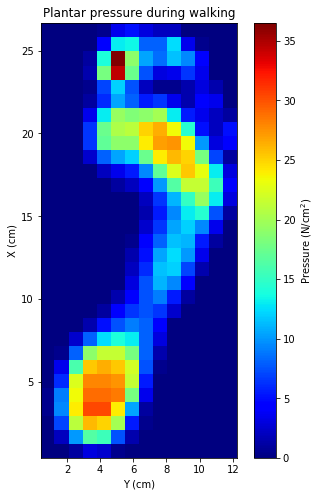

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(6, 8))
img = ax.pcolor(X, Y, data, cmap=cm.jet)
ax.set_aspect('equal')
fig.colorbar(img, label='Pressure (N/cm$^2$)')
ax.set_xlabel('Y (cm)')
ax.set_ylabel('X (cm)')
ax.set_title('Plantar pressure during walking')
plt.show()

#### 2D plot with interpolation

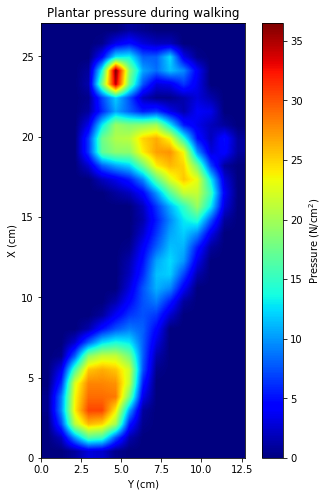

In [7]:
fig, ax = plt.subplots(figsize=(6, 8))
img = ax.imshow(data, cmap=cm.jet, aspect='equal', origin=[0,0], 
                extent=[0, data.shape[1]*dy, 0, data.shape[0]*dx],
                interpolation='bilinear')
fig.colorbar(img, label='Pressure (N/cm$^2$)')
ax.set_xlabel('Y (cm)')
ax.set_ylabel('X (cm)')
ax.set_title('Plantar pressure during walking')
plt.show()

#### 3D plots

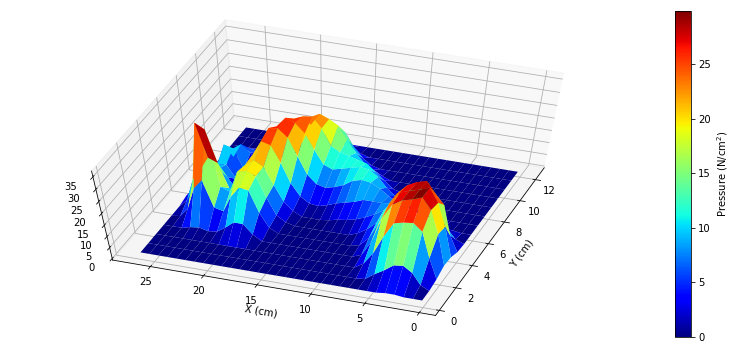

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, data, cmap=cm.jet,
                       rcount=data.shape[0], ccount=data.shape[1],
                       linewidth=0, antialiased=True)
ax.view_init(60, 200)
fig.colorbar(surf, orientation='vertical', label='Pressure (N/cm$^2$)')
ax.set_xlabel('Y (cm)')
ax.set_ylabel('X (cm)')
plt.show()

#### 3D plot with data interpolation

In [9]:
from scipy import interpolate
# interpolate data over a four times denses grid
x2 = np.arange(dx/8, data.shape[0]*dx + dx/8, dx/4)
y2 = np.arange(dy/8, data.shape[1]*dy + dy/8, dy/4)
X2, Y2 = np.meshgrid(y2, x2)
tck = interpolate.bisplrep(X, Y, data)
data2 = interpolate.bisplev(X2[0,:], Y2[:,0], tck).T
print('Shapes:')
print('X2:', X2.shape, 'Y2:', Y2.shape, 'data2:', data2.shape)

Shapes:
X2: (128, 60) Y2: (128, 60) data2: (128, 60)


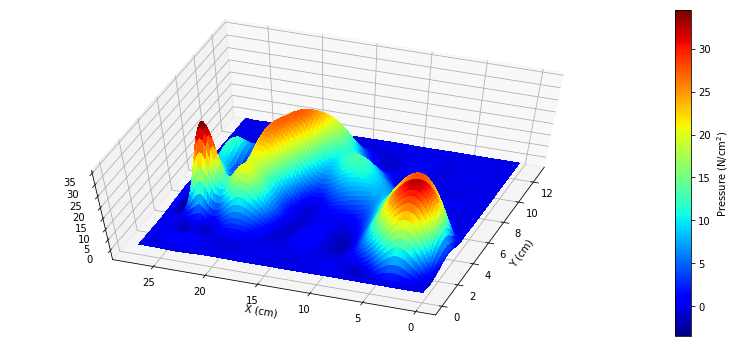

In [10]:
fig = plt.figure(figsize=(14, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X2, Y2, data2, cmap=cm.jet,
                       rcount=data2.shape[0], ccount=data2.shape[1],
                       linewidth=0, antialiased=False)
ax.view_init(60, 200)
fig.colorbar(surf, orientation='vertical', label='Pressure (N/cm$^2$)')
ax.set_xlabel('Y (cm)')
ax.set_ylabel('X (cm)')
plt.show()